In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('car data.csv', usecols=['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type',
                                         'Seller_Type','Transmission'])
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [3]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [4]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
dtype: int64

In [5]:
df['Year']=2020-df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,6,3.35,5.59,27000,Petrol,Dealer,Manual
1,7,4.75,9.54,43000,Diesel,Dealer,Manual
2,3,7.25,9.85,6900,Petrol,Dealer,Manual
3,9,2.85,4.15,5200,Petrol,Dealer,Manual
4,6,4.60,6.87,42450,Diesel,Dealer,Manual


In [6]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,1,0,1
1,7,4.75,9.54,43000,1,0,0,1
2,3,7.25,9.85,6900,0,1,0,1
3,9,2.85,4.15,5200,0,1,0,1
4,6,4.60,6.87,42450,1,0,0,1


In [7]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,-0.236141,0.047584,0.524342,-0.064315,0.059959,0.039896,-0.000394
Selling_Price,-0.236141,1.000000,0.878983,0.029187,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.047584,0.878983,1.000000,0.203647,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.172515,-0.172874,-0.101419,-0.162510
Fuel_Type_Diesel,-0.064315,0.552339,0.473306,0.172515,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,0.059959,-0.540571,-0.465244,-0.172874,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,0.039896,-0.550724,-0.512030,-0.101419,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.000394,-0.367128,-0.348715,-0.162510,-0.098643,0.091013,0.063240,1.000000


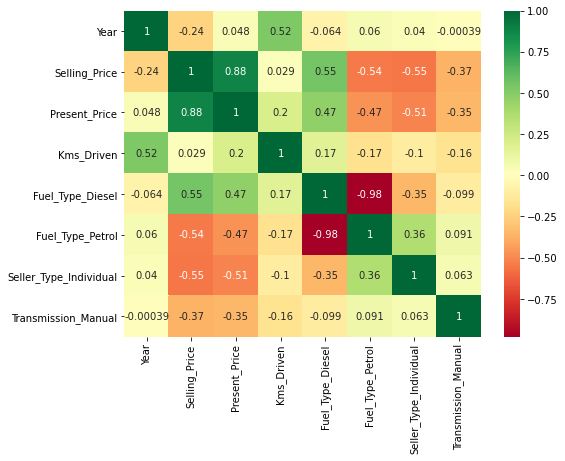

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [10]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,1,0,1
1,7,4.75,9.54,43000,1,0,0,1
2,3,7.25,9.85,6900,0,1,0,1
3,9,2.85,4.15,5200,0,1,0,1
4,6,4.60,6.87,42450,1,0,0,1


In [14]:
X=df.drop(['Selling_Price'], axis=1)
y=df['Selling_Price']

In [17]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
## its a number of randomized decision trees (extra-trees) on various sub-samples of the dataset 
## and uses averaging to improve the predictive accuracy and control over-fitting.
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

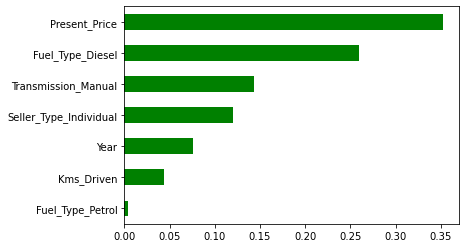

In [19]:
imp_feature=pd.Series(model.feature_importances_, index=X.columns)
imp_feature.sort_values().plot(kind='barh', color='g')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test= train_test_split(X, y, test_size=0.2)

In [45]:
X_train.shape

(240, 7)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=42)

In [47]:
n_estimators= [int(x) for x in np.linspace(start=100, stop=2000, num=12)]
max_features= ['sqrt', 'auto']
max_depth= [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split= [2,5,10, 15, 20]
min_samples_leaf= [1,2,4,5]
grid= {'n_estimators':n_estimators, 'max_features': max_features, 'max_depth':max_depth, 
       'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf }

In [48]:
from sklearn.model_selection import RandomizedSearchCV
grid_rf= RandomizedSearchCV(estimator=rf, param_distributions=grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
                           random_state=42, n_iter=10)
grid_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [49]:
y_pred=grid_rf.predict(X_test)

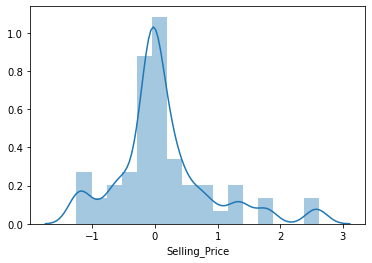

In [54]:
sns.distplot(y_test - y_pred)

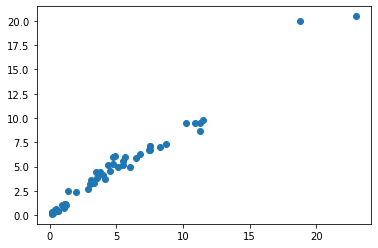

In [55]:
plt.scatter(y_test, y_pred)

In [56]:
import pickle
file= open('rf.pkl', 'wb')
pickle.dump(grid_rf, file)